## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = '/mnt/T3_US_MIT/hadoop/scratch/bthornbe/SUEP/jul2/SUEP-m125-darkPhoHad+RunIIAutumn18-private+MINIAODSIM/merged/SUEP-m125-darkPhoHad+RunIIAutumn18-private+MINIAODSIM_merged_0.hdf5'
event_vars, m = h5load(f,'vars')

In [4]:
event_vars

,ntracks,ngood_fastjets,ht,HLT_PFHT1050,eta_ak4jets0,phi_ak4jets0,pt_ak4jets0,eta_ak4jets1,phi_ak4jets1,pt_ak4jets1,...,ISR_rho0_CO,ISR_rho1_CO,SUEP_pt_CO,SUEP_eta_CO,SUEP_phi_CO,SUEP_mass_CO,ISR_pt_CO,ISR_eta_CO,ISR_phi_CO,ISR_mass_CO
0,108,2,1621.500000,True,-0.111740,2.049316,823.00,-0.562012,-1.187256,798.500,...,19.712297,0.081631,795.462463,-0.569765,-1.169312,408.872024,576.621643,-0.109392,2.046124,72.120033
0,169,3,1499.078125,True,0.323853,-1.810303,443.50,-0.719116,2.324219,260.750,...,0.000000,0.000000,480.901520,0.030984,-1.632440,515.653689,324.398743,-0.670832,1.663635,336.831106
0,155,2,1483.750000,True,-0.200653,1.124756,765.50,2.126953,-2.075684,371.250,...,0.000000,0.000000,744.462158,-0.311142,1.161652,426.780023,412.504456,1.821159,-1.942065,263.328977
1,130,3,2215.281250,True,0.686279,-1.103271,1039.00,1.270264,2.416992,718.000,...,13.811108,1.693702,754.855225,0.613606,-0.918637,1089.514866,537.792236,1.304815,2.426184,190.743135
0,138,2,1251.437500,True,0.523804,-1.856445,300.00,-0.918213,0.596924,241.500,...,0.000000,0.000000,385.114929,-0.655996,-2.162491,758.505903,221.189484,-0.240296,0.846332,299.572102
0,199,2,2268.046875,True,0.134369,-0.452148,1100.00,0.514648,2.999512,549.500,...,8.236862,2.793603,569.222290,0.286669,2.793299,582.932432,996.340576,0.139862,-0.450844,337.098026
0,143,2,1649.312500,True,0.135803,2.643555,780.00,-0.470459,-0.514526,704.000,...,0.000000,3.452649,654.735657,0.145653,2.627147,343.484273,631.059998,-0.596477,-0.536032,319.724767
0,167,2,1211.875000,True,-0.486389,1.636963,530.50,-0.737305,-1.389160,388.500,...,0.000000,0.000000,524.401917,-0.485653,-1.520981,449.661930,212.220978,-0.882053,1.684645,157.263923
0,152,3,1233.015625,True,1.101318,-1.917236,278.50,1.194092,0.531738,268.250,...,0.000000,0.066517,131.924606,2.134379,-0.546461,800.256259,223.304230,-1.460604,1.796712,207.397515
0,185,2,1863.187500,True,0.023540,2.260254,918.00,0.926025,-0.636719,657.000,...,0.000000,0.000000,845.114075,-0.031482,2.271546,466.596154,414.795898,1.050091,-0.837437,314.772458


In [5]:
for key in event_vars:
    print(key)

ntracks
ngood_fastjets
ht
HLT_PFHT1050
eta_ak4jets0
phi_ak4jets0
pt_ak4jets0
eta_ak4jets1
phi_ak4jets1
pt_ak4jets1
eta_ak4jets2
phi_ak4jets2
pt_ak4jets2
eta_ak4jets3
phi_ak4jets3
pt_ak4jets3
eta_ak4jets4
phi_ak4jets4
pt_ak4jets4
eta_ak4jets5
phi_ak4jets5
pt_ak4jets5
eta_ak4jets6
phi_ak4jets6
pt_ak4jets6
eta_ak4jets7
phi_ak4jets7
pt_ak4jets7
eta_ak4jets8
phi_ak4jets8
pt_ak4jets8
eta_ak4jets9
phi_ak4jets9
pt_ak4jets9
ngood_ak4jets
ngood_tracker_ak4jets
n_loose_ak4jets
n_tight_ak4jets
ht_loose
ht_tight
ht_tracker
Pileup_nTrueInt
PV_npvs
PV_npvsGood
resnet_SUEP_pred_ML
SUEP_dphi_SUEP_ISR_IRM
SUEP_nconst_IRM
SUEP_pt_avg_b_IRM
SUEP_pt_mean_scaled_IRM
SUEP_S1_IRM
SUEP_S2_IRM
SUEP_pt_avg_IRM
SUEP_rho0_IRM
SUEP_rho1_IRM
SUEP_pt_IRM
SUEP_eta_IRM
SUEP_phi_IRM
SUEP_mass_IRM
SUEP_nconst_CL
SUEP_pt_avg_b_CL
SUEP_pt_mean_scaled_CL
SUEP_S1_CL
SUEP_S2_CL
ISR_nconst_CL
ISR_pt_avg_b_CL
ISR_pt_mean_scaled_CL
ISR_S1_CL
ISR_S2_CL
SUEP_pt_avg_CL
SUEP_rho0_CL
SUEP_rho1_CL
ISR_pt_avg_CL
ISR_rho0_CL
ISR_rho1_CL

In [8]:
event_vars['resnet_SUEP_pred_model126']

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

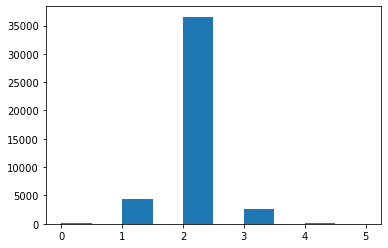

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


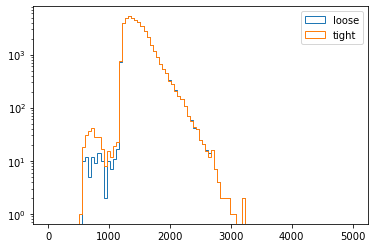

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))